# Predicting the Impact of Air Quality on Human Health


## 1. INTRODUCTION

### Objective
The goal of this project is to develop a machine learning model that can predict how air quality affects human health.

### Background
Air pollution is one of the most influential environmental factors affecting public health. Thus, the aim of this project would be to predict health outcomes through various indicators of air quality.



## 2. Load and Explore Data

In [43]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [44]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
# Load data
data_path = '/content/drive/My Drive/air-quality-respiratory-impact-project/air_quality_health_impact_data.csv'
air_df=  pd.read_csv(data_path)

In [46]:
# Display basic imformation about the dataset
air_df.head()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0


In [47]:
air_df.shape

(5811, 15)

In [48]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811 entries, 0 to 5810
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RecordID             5811 non-null   int64  
 1   AQI                  5811 non-null   float64
 2   PM10                 5811 non-null   float64
 3   PM2_5                5811 non-null   float64
 4   NO2                  5811 non-null   float64
 5   SO2                  5811 non-null   float64
 6   O3                   5811 non-null   float64
 7   Temperature          5811 non-null   float64
 8   Humidity             5811 non-null   float64
 9   WindSpeed            5811 non-null   float64
 10  RespiratoryCases     5811 non-null   int64  
 11  CardiovascularCases  5811 non-null   int64  
 12  HospitalAdmissions   5811 non-null   int64  
 13  HealthImpactScore    5811 non-null   float64
 14  HealthImpactClass    5811 non-null   float64
dtypes: float64(11), int64(4)
memory usage:

In [49]:
air_df.describe()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
count,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000
mean,2906.000000,248.438476,148.654997,100.223714,102.293445,49.456838,149.312431,14.975500,54.776853,9.989177,9.974187,4.988986,2.001033,93.785223,0.281191
std,1677.635538,144.777638,85.698500,58.096612,57.713175,28.530329,86.534240,14.483067,26.020786,5.776950,3.129234,2.216791,1.398794,13.318904,0.714075
min,1.000000,0.005817,0.015848,0.031549,0.009625,0.011023,0.001661,-9.990998,10.001506,0.002094,1.000000,0.000000,0.000000,22.448488,0.000000
25%,1453.500000,122.951293,75.374954,49.435171,53.538538,24.887264,73.999665,2.481500,31.995262,4.952343,8.000000,3.000000,1.000000,98.203057,0.000000
50%,2906.000000,249.127841,147.634997,100.506337,102.987736,49.530165,149.559871,14.942428,54.543904,10.051742,10.000000,5.000000,2.000000,100.000000,0.000000
75%,4358.500000,373.630668,222.436759,151.340260,151.658516,73.346617,223.380126,27.465374,77.641639,14.971840,12.000000,6.000000,3.000000,100.000000,0.000000
max,5811.000000,499.858837,299.901962,199.984965,199.980195,99.969561,299.936812,39.963434,99.997493,19.999139,23.000000,14.000000,12.000000,100.000000,4.000000


## 3. Exploratory Data Analysis(EDA) and Data Preprocessing

In [50]:
# Check for duplicates
air_df.duplicated().sum()

0

In [51]:
# Handle missing values (if any)
air_df.isnull().sum()

,0
RecordID,0
AQI,0
PM10,0
PM2_5,0
NO2,0
SO2,0
O3,0
Temperature,0
Humidity,0
WindSpeed,0


In [52]:
air_df.columns

Index(['RecordID', 'AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature',
       'Humidity', 'WindSpeed', 'RespiratoryCases', 'CardiovascularCases',
       'HospitalAdmissions', 'HealthImpactScore', 'HealthImpactClass'],
      dtype='object')

In [53]:
# Define the classes

#HealthImpactScore: A score indicating the overall health impact based on air quality and other related factors, ranging from 0 to 100.
# HealthImpactClass: Classification of the health impact based on the health impact score:
# 0: 'Very High' (HealthImpactScore >= 80)
# 1: 'High' (60 <= HealthImpactScore < 80)
# 2: 'Moderate' (40 <= HealthImpactScore < 60)
# 3: 'Low' (20 <= HealthImpactScore < 40)
# 4: 'Very Low' (HealthImpactScore < 20)
# Define the new class mapping
def classify_health_impact(impact_class):
  if impact_class==0:
    return 'Very High'
  elif impact_class==1:
    return 'High'
  elif impact_class==2:
    return 'Moderate'
  elif impact_class==3:
    return 'Low'
  else :
    return 'Very Low'

# Apply the classification
air_df['HealthImpactClass_Label'] = air_df['HealthImpactClass'].apply(classify_health_impact)


air_df[['HealthImpactClass','HealthImpactClass_Label']].head()



,HealthImpactClass,HealthImpactClass_Label
0,0.0,Very High
1,0.0,Very High
2,0.0,Very High
3,0.0,Very High
4,0.0,Very High


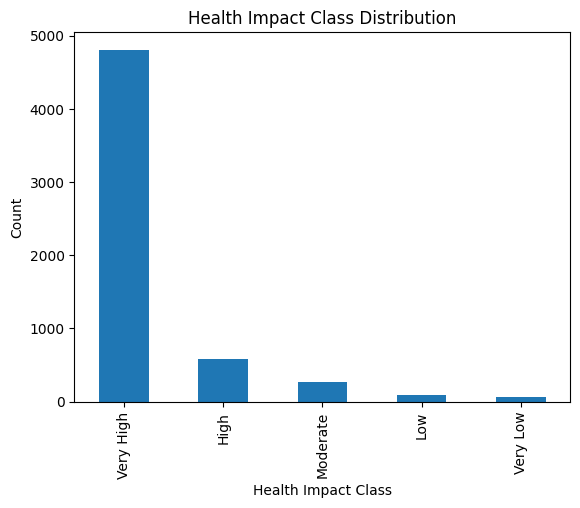

In [54]:
# Check the class distribution
air_df['HealthImpactClass_Label'].value_counts().plot(kind='bar')
plt.title('Health Impact Class Distribution')
plt.xlabel('Health Impact Class')
plt.ylabel('Count')
plt.show()

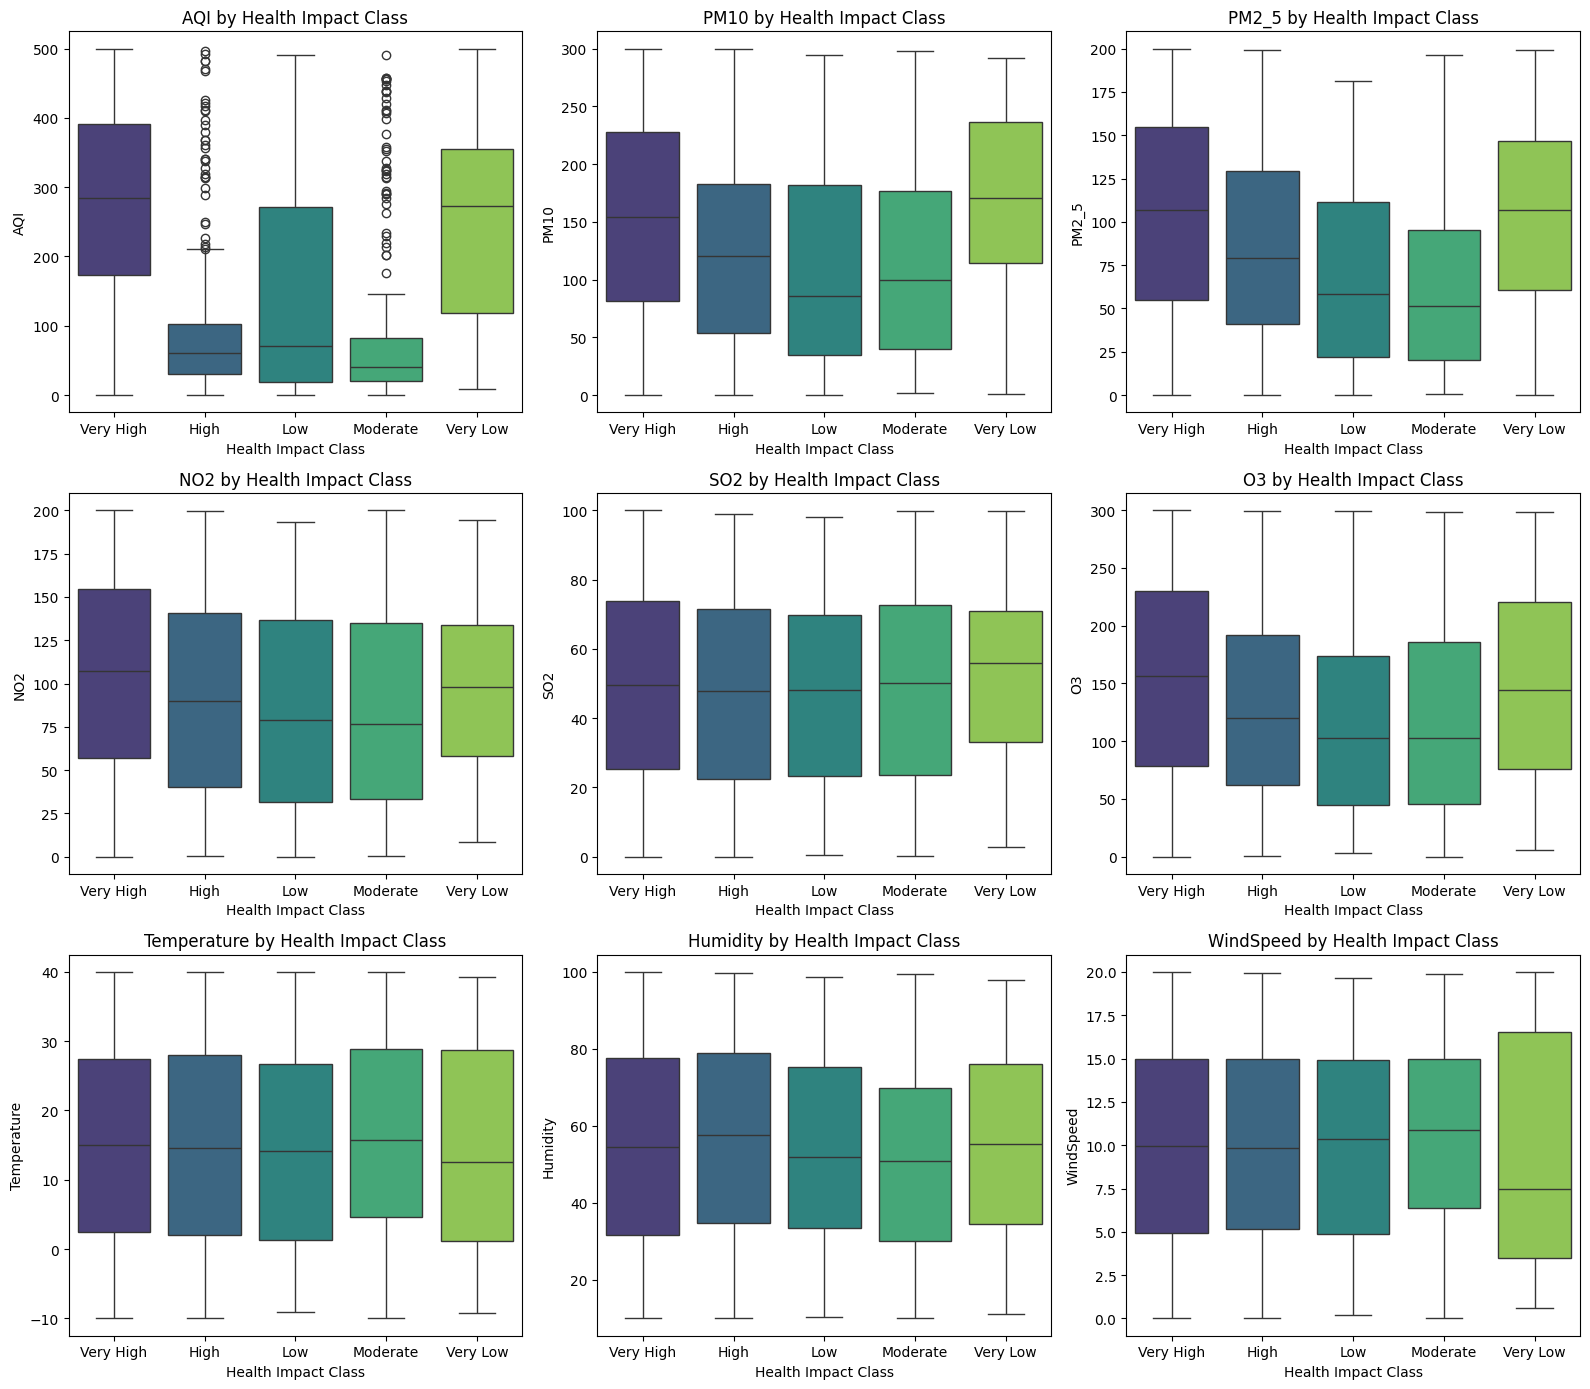

In [55]:
# Visualize distribution of indicators by class
Indicators= ['AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3','Temperature','Humidity', 'WindSpeed' ]

plt.figure(figsize=(16, 14))

for i, Indicator in enumerate(Indicators, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='HealthImpactClass_Label', y=Indicator, data=air_df, palette='viridis')
    plt.title(f'{Indicator} by Health Impact Class')
    plt.xlabel('Health Impact Class')
    plt.ylabel(Indicator)

plt.tight_layout()
plt.show()


Higher levels of pollutants like PM2.5, PM10, NO2, and O3 are linked to more severe health impacts, especially in the 'high' and 'very high' categories. These pollutants show significant variation across classes, highlighting their role in serious health issues. Other factors like SO2, temperature, humidity, and wind speed have a more uniform effect on health outcomes.

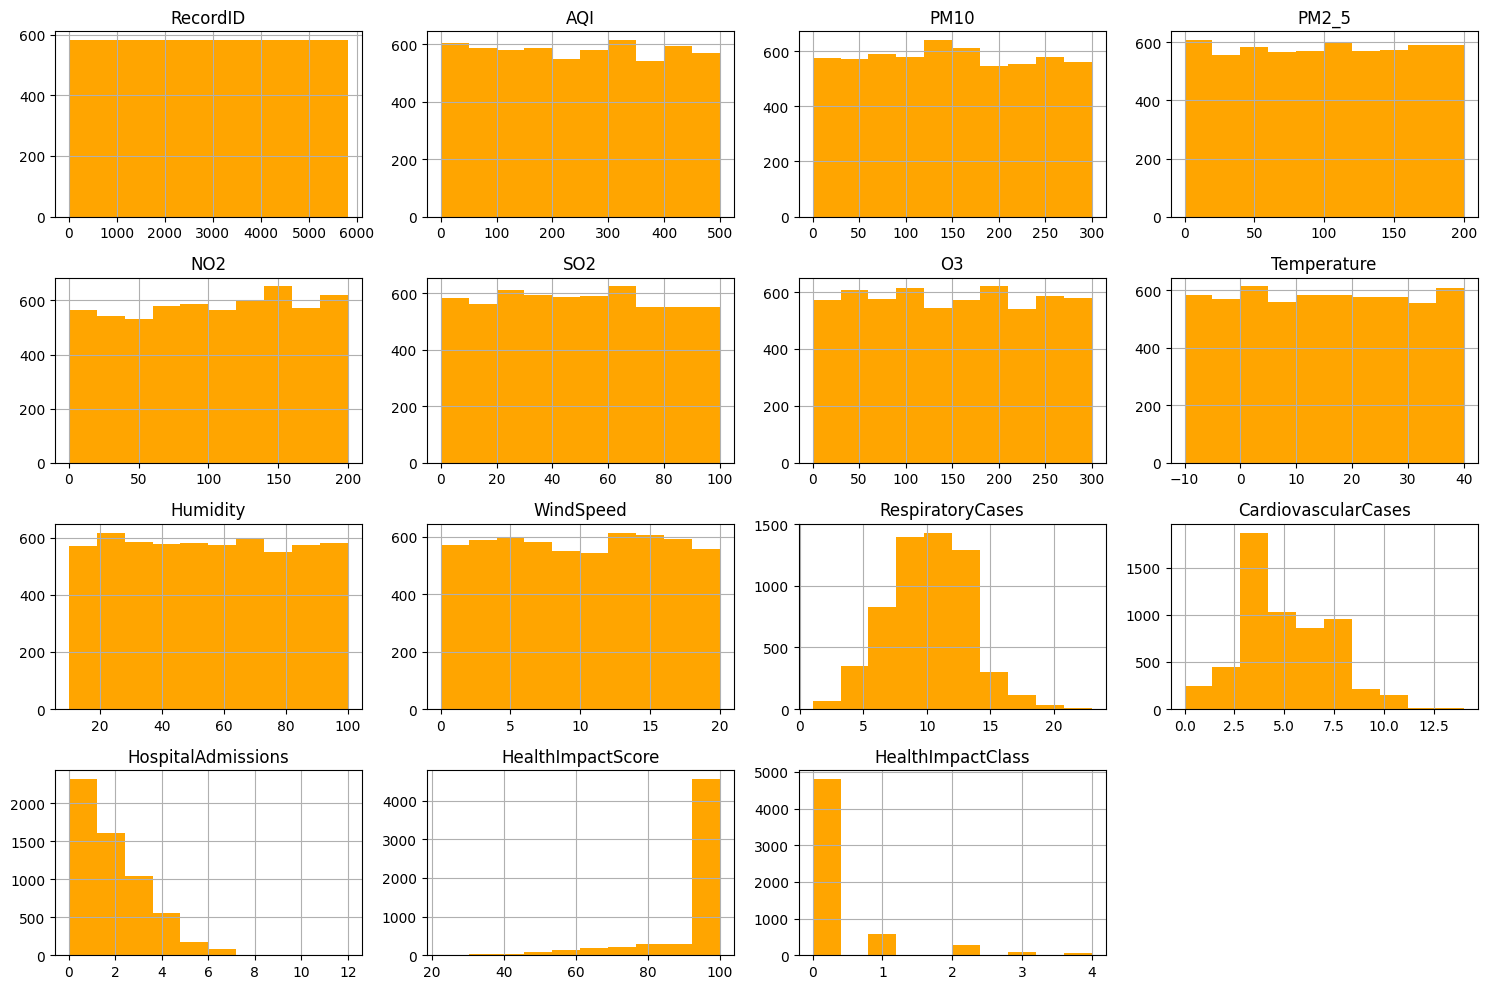

In [56]:
air_df_hist_plot= air_df.hist(figsize=(15, 10), color= 'orange')
plt.tight_layout()
plt.show()

## 4. Feature Engineering

4.1 Data Splitting

In [57]:
# Separate features and target
X = air_df.drop(columns=['HealthImpactScore', 'HealthImpactClass', 'RecordID', 'HealthImpactClass_Label'])
y = air_df['HealthImpactClass']

In [58]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [59]:
X_train.shape, y_train.shape

((4648, 12), (4648,))

In [60]:
X_test.shape, y_test.shape

((1163, 12), (1163,))

4.2 Feature Scaling

In [61]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled.shape


(4648, 12)

In [62]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled.shape

(1163, 12)

4.3 Handling Class Imbalance

In [63]:
# Check the class distribution before applying SMOTE
print(f"Class distribution before SMOTE: {Counter(y_train)}")

Class distribution before SMOTE: Counter({0.0: 3855, 1.0: 455, 2.0: 220, 3.0: 75, 4.0: 43})


In [64]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

In [65]:
# Check the class distribution after SMOTE
print(f"Class distribution after SMOTE: {Counter(y_train_res)}")

Class distribution after SMOTE: Counter({0.0: 3855, 1.0: 3855, 2.0: 3855, 4.0: 3855, 3.0: 3855})


## 5. Model Development

In [66]:
# Import Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

5.1 Baseline model(Logistic Regression)

In [67]:
# Initialize the logistic regression model
logreg= LogisticRegression(random_state= 42, max_iter= 1000 )
logreg.fit(X_train_res, y_train_res)

y_pred_logreg = logreg.predict(X_test_scaled)

accuracy_logreg= accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg: .4f}")

print("Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))

Logistic Regression Accuracy:  0.4093
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.40      0.57       953
         1.0       0.32      0.54      0.40       124
         2.0       0.32      0.42      0.36        53
         3.0       0.01      0.10      0.02        20
         4.0       0.01      0.15      0.01        13

    accuracy                           0.41      1163
   macro avg       0.32      0.32      0.27      1163
weighted avg       0.83      0.41      0.52      1163

Confusion Matrix:
 [[383 123  21 171 255]
 [  4  67  19  28   6]
 [  6  14  22  11   0]
 [  5   2   7   2   4]
 [  4   5   0   2   2]]


5.2 Random Forest

Random Forest Accuracy: 0.8719
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.94      0.94       953
         1.0       0.54      0.69      0.61       124
         2.0       0.55      0.57      0.56        53
         3.0       0.50      0.10      0.17        20
         4.0       0.00      0.00      0.00        13

    accuracy                           0.87      1163
   macro avg       0.51      0.46      0.45      1163
weighted avg       0.87      0.87      0.87      1163

Confusion Matrix:
 [[897  53   1   1   1]
 [ 22  85  17   0   0]
 [ 10  12  30   1   0]
 [ 10   2   6   2   0]
 [  8   4   1   0   0]]


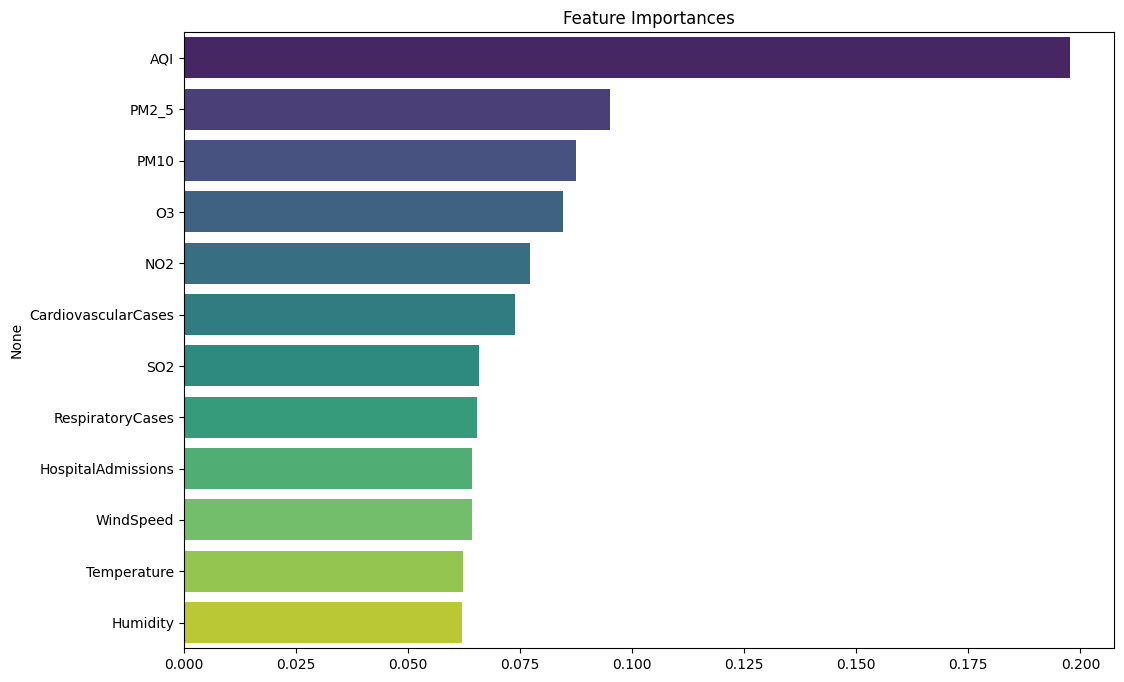

In [68]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_res, y_train_res)


y_pred_rf = rf.predict(X_test_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Feature importance visualization
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 8))
sns.barplot(x=importances[indices], y=X.columns[indices], palette='viridis')
plt.title('Feature Importances')
plt.show()

In [69]:
# Assuming X_train_scaled has column names
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


                Feature  Importance
0                   AQI    0.197665
2                 PM2_5    0.095071
1                  PM10    0.087473
5                    O3    0.084585
3                   NO2    0.077287
10  CardiovascularCases    0.073850
4                   SO2    0.065893
9      RespiratoryCases    0.065329
11   HospitalAdmissions    0.064327
8             WindSpeed    0.064278
6           Temperature    0.062166
7              Humidity    0.062077


5.3 Gradient Boosting

In [70]:
# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_res, y_train_res)

y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb:.4f}")

print("Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.8169
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.89      0.91       953
         1.0       0.39      0.52      0.45       124
         2.0       0.49      0.57      0.53        53
         3.0       0.21      0.15      0.18        20
         4.0       0.00      0.00      0.00        13

    accuracy                           0.82      1163
   macro avg       0.41      0.43      0.41      1163
weighted avg       0.83      0.82      0.82      1163

Confusion Matrix:
 [[852  82   3   4  12]
 [ 33  65  21   5   0]
 [ 10  11  30   2   0]
 [  8   3   6   3   0]
 [  8   4   1   0   0]]


5.4 XGBoost

In [71]:
# XGBoost Classifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_res, y_train_res)

y_pred_xgb = xgb.predict(X_test_scaled)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

XGBoost Accuracy: 0.8882
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.97      0.95       953
         1.0       0.66      0.64      0.65       124
         2.0       0.58      0.55      0.56        53
         3.0       0.43      0.15      0.22        20
         4.0       0.00      0.00      0.00        13

    accuracy                           0.89      1163
   macro avg       0.52      0.46      0.48      1163
weighted avg       0.87      0.89      0.88      1163

Confusion Matrix:
 [[922  28   2   1   0]
 [ 31  79  13   1   0]
 [ 12  10  29   2   0]
 [ 11   1   5   3   0]
 [ 10   2   1   0   0]]


## 6.Model Comparison

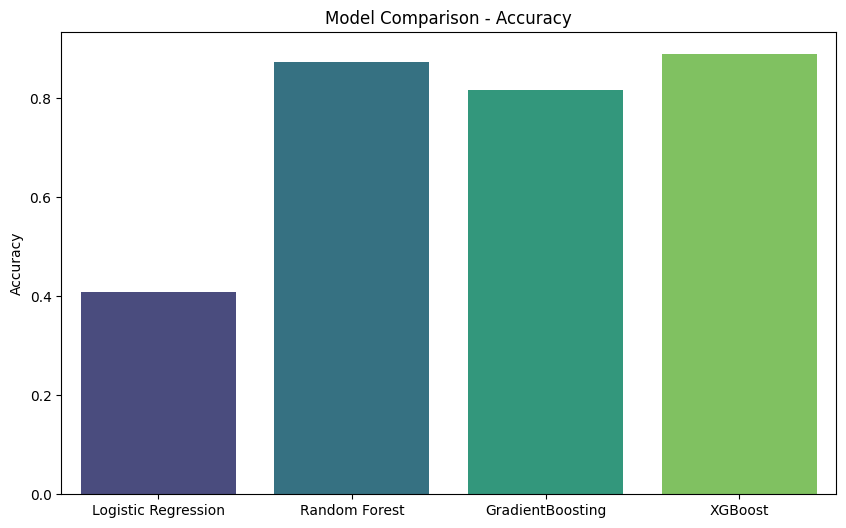

In [72]:
# Comparison of model performance
models = ['Logistic Regression', 'Random Forest', 'GradientBoosting', 'XGBoost']
accuracies = [accuracy_logreg, accuracy_rf, accuracy_gb, accuracy_xgb]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Model Comparison - Accuracy')
plt.ylabel('Accuracy')
plt.show()



## 7. Conclusion


In this project, we developed multiple machine learning models to predict the impact of air quality on human health. After applying SMOTE to address class imbalance, we evaluated four models: Logistic Regression, Decision Tree, Random Forest, and XGBoost. The Random Forest model provided the best performance, as shown by the highest accuracy and balanced classification metrics.



In [74]:
!

Air-quality-health-prediction.ipynb  README.md
